In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


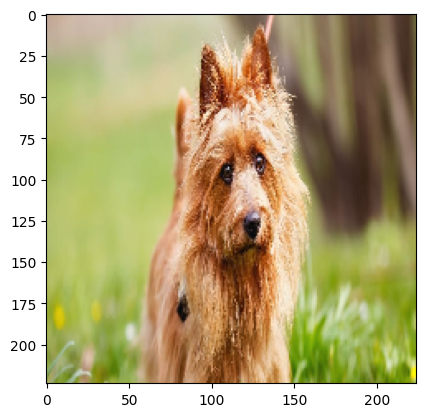

In [3]:
# Load image
img = image.load_img('/content/drive/MyDrive/Samples/dog.jpeg', target_size=(224, 224))
plt.imshow(img)
plt.show()

In [4]:
# Transform image into array
img_array = image.img_to_array(img)

In [5]:
# Add batch dimension
img_batch = np.expand_dims(img_array, axis=0)

In [6]:
# Preprocess image
img_preprocessed = preprocess_input(img_batch)

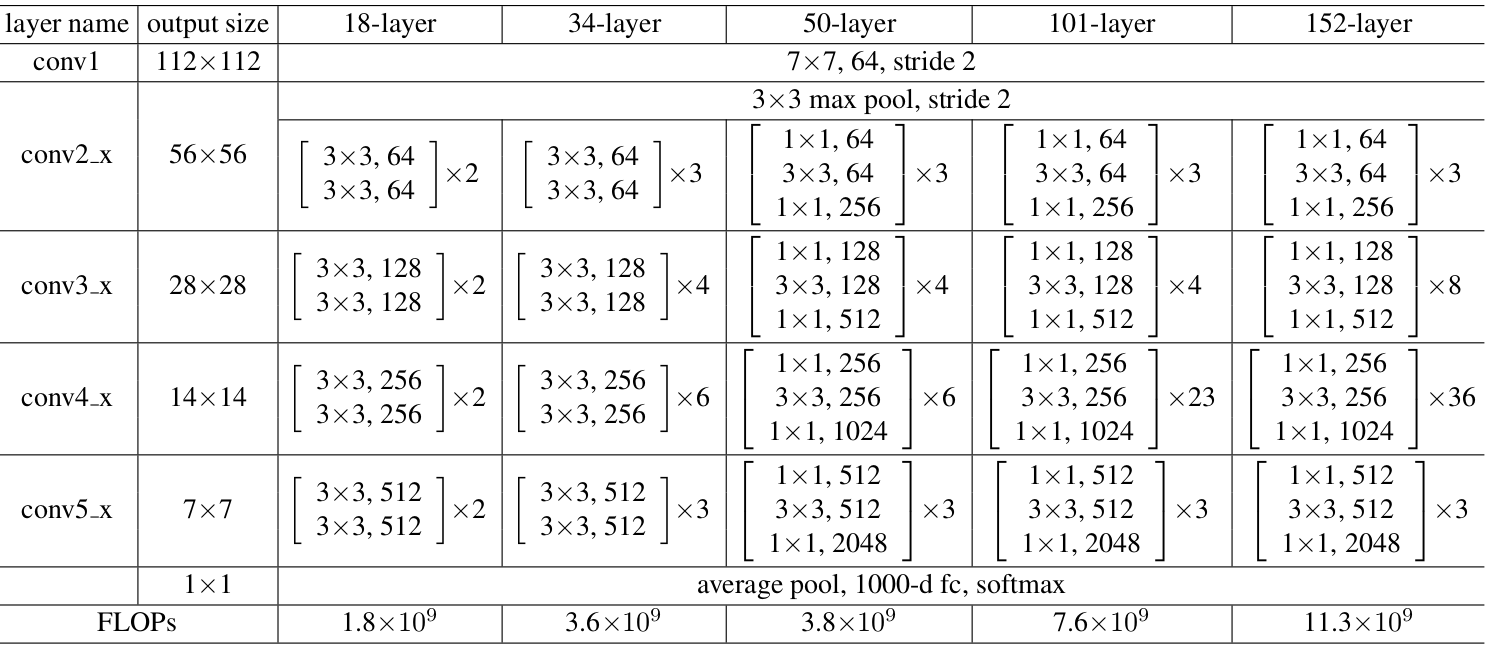

In [7]:
# Load ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)
model.summary()

102967424/102967424 [==============================] - 2s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [8]:
# Predict class
prediction = model.predict(img_preprocessed)
decoded = decode_predictions(prediction, top=5)
print(decoded)

35363/35363 [==============================] - 0s 0us/step
[[('n02096294', 'Australian_terrier', 0.8776986), ('n02093991', 'Irish_terrier', 0.111192316), ('n02106030', 'collie', 0.0020681797), ('n02096051', 'Airedale', 0.0010052173), ('n02115913', 'dhole', 0.0009968232)]]
